# Airline Portfolio Optimization Project

---
Rodrigo Soriano & Philip Bachas-Daunert

**Option 1: Pick your 20 favorite stocks.**

In [23]:
# Importing modules

import gurobipy as gp # Import gurobipy, abbreviate as gp

from gurobipy import Model, GRB # From gurobipy import Model class and GRB solver

import pandas as pd # Import pandas for data analysis 

import matplotlib.pyplot as plt # Import matplotlib for plotting

import numpy as np # Import numpy for numerical operations

from math import sqrt # Import square root function from math module

import yfinance as yf # Import yfinance to get stock data

#Abstract


---


In present-day Miami, Rodrigo and Philip work in an investment company that caters to eccentric upper-class clients. One day, Tom Cruise enters the office unannounced and requests the following from the young, upstart investors:

“My son, Connor Antony, has had trouble finding a direction in life. He is 28 years old and has recently told me that he aspires to be a day trader. As my friend David Miscavige says, ‘one of our important maxims is that a being is as valuable as one is able to help others.’ I want to help my son but I have some constraints, as the budget for ['Mission: Impossible - Dead Reckoning Part Two'](https://www.imdb.com/title/tt9603208/) has ballooned quite a bit recently since we keep trying to up the stakes of the action.”

## Constraints


---


### (1) A NASDAQ/NYSE Portfolio of 20 Airline companies with financial data dating back to July 2019.

“I have had a passion for aviation ever since shooting the movie ['Top Gun'](https://www.imdb.com/title/tt0092099/) and it has rubbed off on Connor Antony. I figured since we both are passionate about this field I can help him daily to understand industry trends.”

$A = \{a_1, a_2, \ldots, a_{20}\}$

### (2) Initial Investment is $1,000,000.

“I know it is a meager sum to start a portfolio, but being a producer has me pinching pennies in other areas for the sake of ['Mission: Impossible - Dead Reckoning Part Two'](https://www.imdb.com/title/tt9603208/).”

$I = 1,000,000$

### (3) Upper Limit of Risk Tolerance of $\sigma = 30\%$.

“Connor Antony can take a lot of risk in this venture as I may need some extra funds later to fund ['Mission: Impossible - Dead Reckoning Part Two'](https://www.imdb.com/title/tt9603208/). As I learned from my time on the set of ['Rain Man'](https://www.imdb.com/title/tt0095953/), sometimes you have to take risks to make a lot of money.”

$ \sigma(R) \leq 0.30$

### (4) Constraint on Individual Weights

This is a follow-up addition to added by Rodrigo and Philip.

$w_i \leq 0.1337 \quad \forall i \in \{1, 2, \ldots, n\}$

# The 'Problem' Data


---

We will be solving this portfolio optimization problem by using the Markowitz framework.

\begin{align*}
\text{Maximize} \quad & E(R) \\
\text{subject to} \quad & \sum_{i=1}^{20} w_i \cdot r_i = E(R) \\
& \sum_{i=1}^{20} w_i = 1 \\
& w_i \cdot I = X_i, \quad i=1,\ldots,20 \\
& \sigma(R) \leq 0.30 \\
&w_i \leq 0.1337, \quad i=1,\ldots,20
\end{align*}

Here:
- $E(R)$ is the expected return of the portfolio.
- $r_i$ is the expected return of asset $i$.
- $w_i$ is the proportion of total investment in asset $i$.
- $X_i$ is the amount of money invested in asset $i$.
- $\sigma(R)$ is the risk of the portfolio.
- $I = 1,000,000$

The added complication of Tom Cruise's request is how volatile the airline industry has been since the COVID-19 Pandemic started in late 2019. Rodrigo and Philip are not quite sure if this part of the challenge for Connor Antony or if Tom Cruise just really loves airplanes and the airline industry. Read this International Air Transport Association funded article from December 2022 for a holistic understanding of this industry's volatility: [Understanding the pandemic’s impact on the aviation value chain](https://www.iata.org/en/iata-repository/publications/economic-reports/understanding-the-pandemics-impact-on-the-aviation-value-chain/).

## Class Notes on Portfolio Selection Optimization for Reference
This model is an example of the classic [Markowitz portfolio selection optimization model](https://en.wikipedia.org/wiki/Markowitz_model). We want to find the fraction of the portfolio to invest among a set of stocks that balances risk and return. It is a Quadratic Programming (QP) model with vector and matrix data for returns and risk, respectively. This is best suited to a matrix formulation, so we use the Gurobi Python *matrix* interface. The basic model is fairly simple, so we also solve it parametrically to find the efficient frontier.

### Model Formulation
#### Parameters

We use the [Greek values](https://en.wikipedia.org/wiki/Greeks_\(finance\)) that are traditional in finance:

- $\delta$: n-element vector measuring the change in price for each stock
- $\sigma$: n x n matrix measuring the covariance among stocks

There is one additional parameter when solving the model parametrically:

- r: target return


#### Decision Variables
- $x \ge 0$: n-element vector where each element represents the fraction of the porfolio to invest in each stock

#### Objective Function
Minimize the total risk, a convex quadratic function:

\begin{equation}
\min x^t \cdot \sigma \cdot x
\end{equation}

#### Constraints

Allocate the entire portfolio: the total investments should be 1.0 (100%), where $e$ is a unit vector (all 1's):

\begin{equation}
e \cdot x = 1
\end{equation}


Return: When we solve the model parametrically for different return values $r$, we add a constraint on the target return:

\begin{equation}
\delta \cdot x = r
\end{equation}

# Part (A)

## Collect data about the stocks' returns (based on closing price/month) for, at the minimum, the last 3 months. You can find such data on the internet, for example at [Yahoo! Finance](https://finance.yahoo.com/lookup).



---
Here is a list of the 20 airline stocks we are going to analyze. The period is from 04-2021 to 10-2023. Please note that based upon the Investor Relations Annual Review Documents some airlines have FYs that do not end in December.:

* AAL
* DAL
* UAL
* LUV
* RYAAY
* JBLU
* SAVE
* VLRS
* ULCC
* GOL
* AZUL
* CPA
* HA
* MESA
* ALK
* SNCY
* ALGT
* ATSG
* UP
* SKYW





In [24]:
# List of airline stocks to analyze
stocks = ['AAL', 'ALGT', 'ALK', 'ATSG', 'AZUL',  
          'CPA', 'DAL', 'GOL', 'HA', 'JBLU',
          'LUV', 'MESA', 'RYAAY', 'SAVE', 'SKYW', 
          'SNCY', 'UAL', 'ULCC', 'UP', 'VLRS']

# Download 30 months of historical data for stocks
# Using yfinance module to get data
data = yf.download(stocks, period = '30mo')

[*********************100%%**********************]  20 of 20 completed


In [25]:
# Showing the data loaded properly
print(data)

           Adj Close                                                        \
                 AAL   ALGT   ALK  ATSG  AZUL   CPA   DAL  GOL    HA  JBLU   
Date                                                                         
2021-04-06     24.06 250.48 73.74 30.70 21.14 80.32 51.54 8.07 27.04 21.25   
2021-04-07     23.93 249.09 72.36 29.18 21.07 78.30 50.09 7.97 26.33 21.05   
2021-04-08     23.65 249.57 72.69 29.17 21.64 79.21 49.71 8.40 26.25 21.09   
2021-04-09     23.54 251.37 72.63 29.40 20.81 78.65 49.17 8.28 26.08 21.06   
2021-04-12     22.91 247.87 71.30 29.27 20.13 78.83 48.72 8.12 25.49 20.50   
...              ...    ...   ...   ...   ...   ...   ...  ...   ...   ...   
2023-09-29     12.81  76.86 37.08 20.87  8.59 89.12 37.00 2.74  6.33  4.60   
2023-10-02     12.75  75.28 36.83 20.80  8.05 86.36 36.45 2.63  5.79  4.64   
2023-10-03     12.29  73.98 35.80 20.74  7.50 83.37 35.24 2.45  5.51  4.51   
2023-10-04     12.73  75.85 36.13 21.00  7.68 85.05 36.06 2.55  

In [26]:
# Check if DataFrame has any NaN values 

has_nans = data.isna().any().any()

# data.isna() returns True for each NaN
# .any() checks if any NaN per column
# Chaining .any() checks if any NaN overall

# Print confirmation message
print(f"Does the DataFrame have NaN values? {'Yes' if has_nans else 'No'}")

Does the DataFrame have NaN values? No


# Part (B)
## Compute the average return and the covariance matrix.

In [27]:
# Get closing prices as array
closes = np.transpose(np.array(data.Close))

# Calculate absolute daily change 
absdiff = np.diff(closes)  

# Calculate relative daily change
reldiff = np.divide(absdiff, closes[:,:-1])  

# Mean daily price change for each stock
delta = np.mean(reldiff, axis=1) 

# Covariance matrix of relative changes  
sigma = np.cov(reldiff)

# Standard deviation of relative changes
std = np.std(reldiff, axis=1)

# Part (C)
## Plot the efficient frontier of your optimal portfolio of minimum variance.

In [28]:
# Create a model
m = gp.Model('portfolio')

# Add variable for the stocks
x = m.addMVar(len(stocks))

# Add a risk constraint
m.addConstr(x @ sigma @ x <= 0.30**2, 'risk')

# Add weight constraints for each stock

upper_bound = 0.1337  # Upper weight limit per stock

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk = x @ sigma @ x
m.setObjective(portfolio_risk, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0xc3ce4aa2
Model has 210 quadratic objective terms
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-04, 5e-03]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-04, 1e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [9e-02, 9e-02]
Presolve time: 0.00s
Presolved: 43 rows, 63 columns, 483 nonzeros
Presolved model has 2 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 8.600e+02
 Factor NZ  : 9.460e+02
 Factor Ops : 2.743e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
 

In [29]:
# Get volatility (standard deviation) of minimum risk portfolio 
minrisk_volatility = sqrt(m.ObjVal)  

# Get expected return of minimum risk portfolio
minrisk_return = delta @ x.X   

# Create DataFrame to show allocation & results
pd.DataFrame(data=np.append(x.X, [minrisk_volatility, minrisk_return]),
             index=stocks + ['Volatility', 'Expected Return'],
             columns=['Minimum Risk Portfolio'])

,Minimum Risk Portfolio
AAL,0.00
ALGT,0.00
ALK,0.00
ATSG,0.32
AZUL,0.00
CPA,0.14
DAL,0.00
GOL,0.00
HA,0.00
JBLU,0.00


In [30]:
# Expression for portfolio expected return
portfolio_return = delta @ x  

# Add constraint to set target return level
target = m.addConstr(portfolio_return == minrisk_return, 'target') 

# Initialize array to store efficient frontier
frontier = np.empty((2,0))  

# Iterate through range of target returns
for r in np.linspace(delta.min(), delta.max(), 25):
  
  # Set target return for this iteration
  target.rhs = r
  
  # Re-optimize model
  m.optimize()  

  # Add volatility & return to frontier array
  frontier = np.append(frontier, [[sqrt(m.ObjVal])], [r]], axis=1)

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x7e0be575
Model has 210 quadratic objective terms
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [9e-07, 1e+00]
  QMatrix range    [2e-04, 5e-03]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-04, 1e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-03, 1e+00]
  QRHS range       [9e-02, 9e-02]
Presolve time: 0.00s
Presolved: 44 rows, 63 columns, 503 nonzeros
Presolved model has 2 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 9.010e+02
 Factor NZ  : 9.900e+02
 Factor Ops : 2.937e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
 

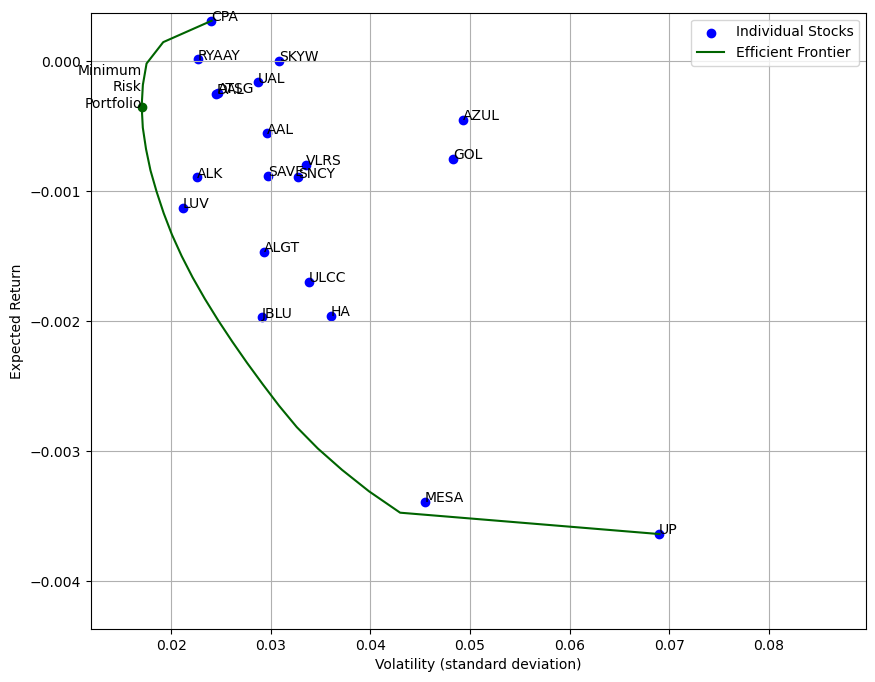

In [31]:
# Efficient Frontier Graph

fig, ax = plt.subplots(figsize=(10,8))

# Plot volatility versus expected return for individual stocks
ax.scatter(x=std, y=delta,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax.annotate(stock, (std[i], delta[i]))

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return),
            horizontalalignment='right')

# Plot efficient frontier
ax.plot(frontier[0], frontier[1], label='Efficient Frontier', color='DarkGreen')

# Format and display the final plot
ax.axis([frontier[0].min()*0.7, frontier[0].max()*1.3, delta.min()*1.2, delta.max()*1.2])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
ax.grid()
plt.show()

#Part (D)
## Set your target return to be equal to the average return across all stocks. What is your optimal portfolio?

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 21 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x9a74a124
Model has 210 quadratic objective terms
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-04, 5e-03]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-04, 1e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-01, 1e+00]
  QRHS range       [9e-02, 9e-02]
Presolve removed 20 rows and 0 columns
Presolve time: 0.00s
Presolved: 1 rows, 20 columns, 20 nonzeros
Presolved model has 210 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 19
 AA' NZ     : 1.900e+02
 Factor NZ  : 2.100e+02
 Factor Ops : 2.870e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal     

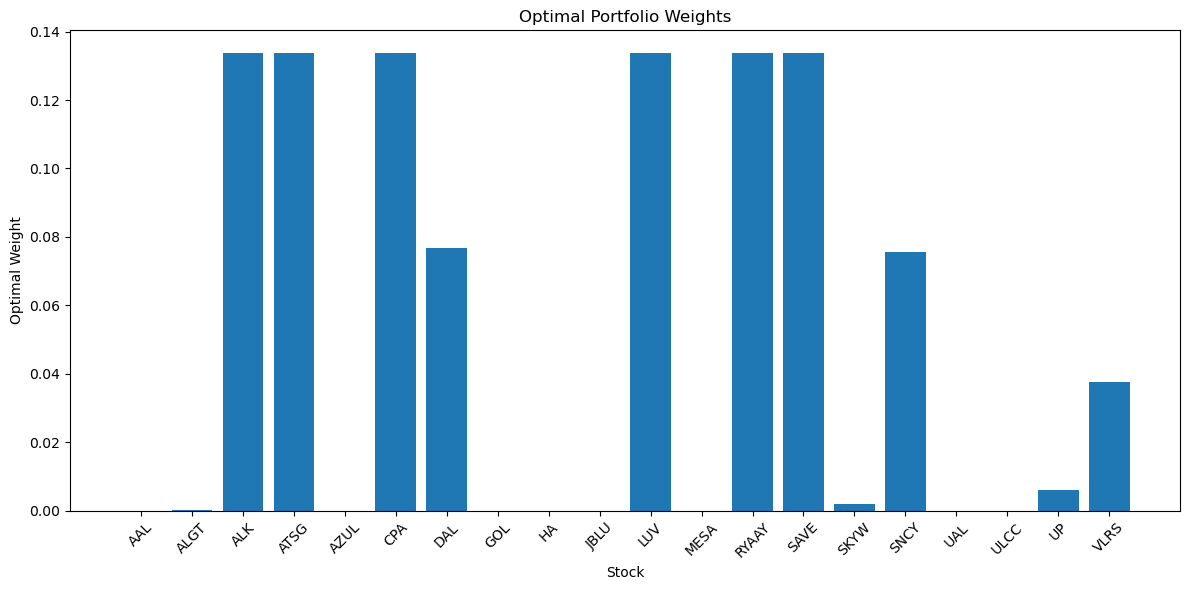

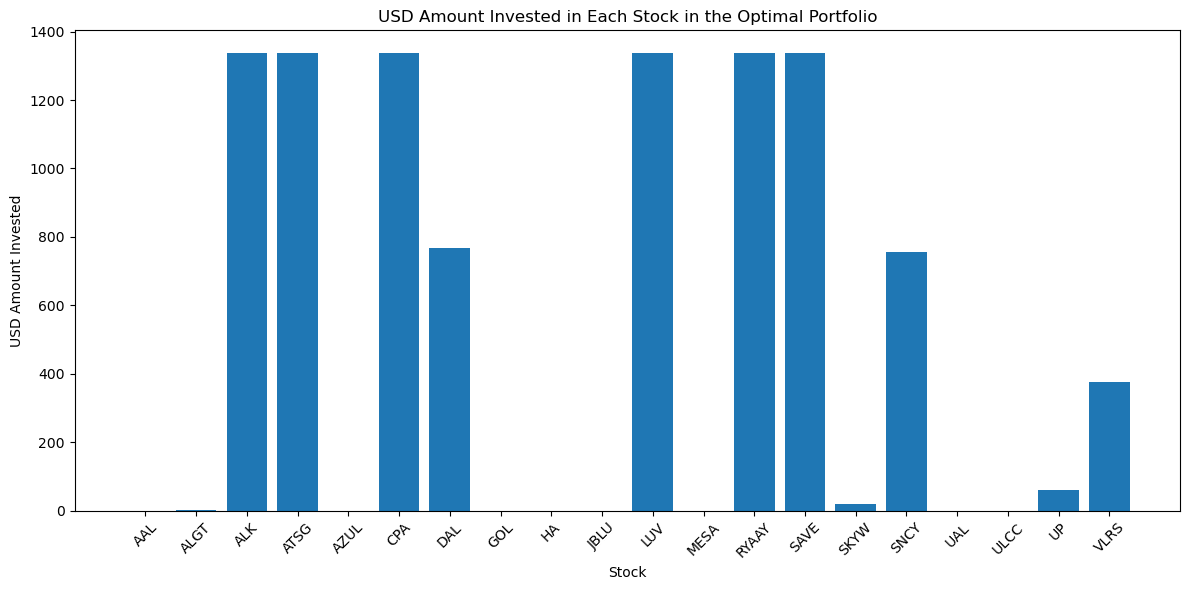

In [32]:
# Create a model
m = gp.Model('portfolio')

# Add variable for the stocks
x = m.addMVar(len(stocks))

# Constraint: Overall risk of the portfolio should not exceed 0.30
m.addConstr(x @ sigma @ x <= 0.30**2, 'risk')

# Constraint: Weight of each individual stock should not exceed 13.37% (0.1337)
upper_bound = 0.1337
for i in range(len(stocks)):
    m.addConstr(x[i] <= upper_bound, f'upper_weight_{stocks[i]}')

# Objective: minimize the portfolio risk, modeled using covariance matrix sigma
m.setObjective(x @ sigma @ x, GRB.MINIMIZE)

# Constraint: Sum of weights should be equal to 1 (i.e., full investment)
m.addConstr(x.sum() == 1, 'budget')

# Optimize model to find the minimum risk portfolio
m.optimize()

# Ensure that an optimal solution is found
if m.status == GRB.Status.OPTIMAL:
    print('Optimal solution found!')
    
    # Extracting optimal weights from the solution
    optimal_weights = x.x
    
    # Calculating the amounts invested in each stock, assuming an overall investment value.
    # For instance, if you're investing a total of 10,000 USD, it would be:
    investment = 10000
    amounts_invested = optimal_weights * investment
    
    # Plotting optimal portfolio weights
    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(stocks, optimal_weights)
    ax.set_xlabel('Stock')
    ax.set_ylabel('Optimal Weight')
    ax.set_title('Optimal Portfolio Weights')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plotting USD amount per stock
    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(stocks, amounts_invested)
    ax.set_xlabel('Stock')
    ax.set_ylabel('USD Amount Invested')
    ax.set_title('USD Amount Invested in Each Stock in the Optimal Portfolio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('No optimal solution found. Status code:', m.status)

In [33]:
pd.set_option('display.float_format', '{:.2e}'.format)

# Create DataFrame for Optimal Portfolio Weights
df_weights = pd.DataFrame({
    'Stock': stocks,
    'Optimal Weight': optimal_weights
})
print("\nOptimal Portfolio Weights:")
print(df_weights)


Optimal Portfolio Weights:
    Stock  Optimal Weight
0     AAL        1.79e-08
1    ALGT        7.96e-05
2     ALK        1.34e-01
3    ATSG        1.34e-01
4    AZUL        7.70e-07
5     CPA        1.34e-01
6     DAL        7.67e-02
7     GOL        4.60e-08
8      HA        1.21e-08
9    JBLU        5.39e-08
10    LUV        1.34e-01
11   MESA        3.67e-08
12  RYAAY        1.34e-01
13   SAVE        1.34e-01
14   SKYW        1.88e-03
15   SNCY        7.56e-02
16    UAL        2.01e-08
17   ULCC        3.38e-08
18     UP        5.94e-03
19   VLRS        3.76e-02


In [34]:
pd.set_option('display.float_format', '{:.2f}'.format)

# Create DataFrame for USD Amount Invested in Each Stock
df_invested = pd.DataFrame({
    'Stock': stocks,
    'USD Amount Invested': amounts_invested
})
df_invested['USD Amount Invested'] = df_invested['USD Amount Invested'].round(2)
print("\nUSD Amount Invested in Each Stock:")
print(df_invested)



USD Amount Invested in Each Stock:
    Stock  USD Amount Invested
0     AAL                 0.00
1    ALGT                 0.80
2     ALK              1337.00
3    ATSG              1337.00
4    AZUL                 0.01
5     CPA              1337.00
6     DAL               767.32
7     GOL                 0.00
8      HA                 0.00
9    JBLU                 0.00
10    LUV              1337.00
11   MESA                 0.00
12  RYAAY              1337.00
13   SAVE              1337.00
14   SKYW                18.81
15   SNCY               755.56
16    UAL                 0.00
17   ULCC                 0.00
18     UP                59.42
19   VLRS               376.09


# Conclusion


---

Six months later, Tom Cruise storms into Rodrigo and Philip’s office, a fierce glare on his face.

"I know ['The Color of Money'](https://www.imdb.com/title/tt0090863/) is green, but I see red all over Connor Antony’s airline portfolio! What is going on?!” scowled Tom Cruise.

Rodrigo and Philip quickly presented Tom Cruise with a detailed Jupyter Notebook explanation of their portfolio optimization via the Markowitz framework. The pair demonstrated that their efficient frontier figure had skewed data, resulting in a poor efficient frontier indication—not ideal for a profitable and diverse portfolio. Even the inclusion of a constraint for the upper bound on the 20 stocks’ Individual Weights did little to enhance the diversity and profitability of the portfolio.


* [AAL](https://finance.yahoo.com/quote/AAL) | Weight: 1.95e-08 | Initial Investment: \$0.02
* [ALGT](https://finance.yahoo.com/quote/ALGT) | Weight: 1.76e-04 | Initial Investment: \$176.37
* [ALK](https://finance.yahoo.com/quote/ALK) | Weight: 1.34e-01 | Initial Investment: \$133,699.96
* [ATSG](https://finance.yahoo.com/quote/ATSG) | Weight: 1.34e-01 | Initial Investment: \$133,699.99
* [AZUL](https://finance.yahoo.com/quote/AZUL) | Weight: 8.57e-07 | Initial Investment: \$0.86
* [CPA](https://finance.yahoo.com/quote/CPA) | Weight: 1.34e-01 | Initial Investment: \$133,699.98
* [DAL](https://finance.yahoo.com/quote/DAL) | Weight: 7.78e-02 | Initial Investment: \$77,775.10
* [GOL](https://finance.yahoo.com/quote/GOL) | Weight: 5.20e-08 | Initial Investment: \$0.05
* [HA](https://finance.yahoo.com/quote/HA) | Weight: 1.30e-08 | Initial Investment: \$0.01
* [JBLU](https://finance.yahoo.com/quote/JBLU) | Weight: 6.19e-08 | Initial Investment: \$0.06
* [LUV](https://finance.yahoo.com/quote/LUV) | Weight: 1.34e-01 | Initial Investment: \$133,699.99
* [MESA](https://finance.yahoo.com/quote/MESA) | Weight: 3.72e-08 | Initial Investment: \$0.04
* [RYAAY](https://finance.yahoo.com/quote/RYAAY) | Weight: 1.34e-01 | Initial Investment: \$133,699.99
* [SAVE](https://finance.yahoo.com/quote/SAVE) | Weight: 1.34e-01 | Initial Investment: \$133,699.94
* [SKYW](https://finance.yahoo.com/quote/SKYW) | Weight: 2.71e-03 | Initial Investment: \$2,710.52
* [SNCY](https://finance.yahoo.com/quote/SNCY) | Weight: 7.35e-02 | Initial Investment: \$73,486.24
* [UAL](https://finance.yahoo.com/quote/UAL) | Weight: 2.18e-08 | Initial Investment: \$0.02
* [ULCC](https://finance.yahoo.com/quote/ULCC) | Weight: 3.63e-08 | Initial Investment: \$0.04
* [UP](https://finance.yahoo.com/quote/UP) | Weight: 6.15e-03 | Initial Investment: \$6,145.84
* [VLRS](https://finance.yahoo.com/quote/VLRS) | Weight: 3.75e-02 | Initial Investment: \$37,504.97

Rodrigo and Philip confidently asserted to Tom Cruise that this was a pivotal lesson for Connor Antony: portfolios need to have diversification across multiple industries and company sizes. Tom Cruise nodded, remarking, “Well, at least this wasn’t a costly lesson, as I have recently secured extra funding for ['Mission: Impossible - Dead Reckoning Part Two'](https://www.imdb.com/title/tt9603208/) from the studio!” As Tom Cruise exited the office, reassured of this financial lesson for Connor Antony, he overheard Rodrigo and Philip muse, “Day trading is a ['Risky Business'](https://www.imdb.com/title/tt0086200/) without diversification in your portfolio.”